# Explainable Healthcare AI (ChatGPT-like Core)

This notebook builds:
1. A healthcare risk prediction model
2. An explainability layer to understand predictions
3. A foundation for a ChatGPT-like healthcare assistant

Disclaimer:
This project is for educational purposes only.
It does NOT provide medical diagnosis or treatment.


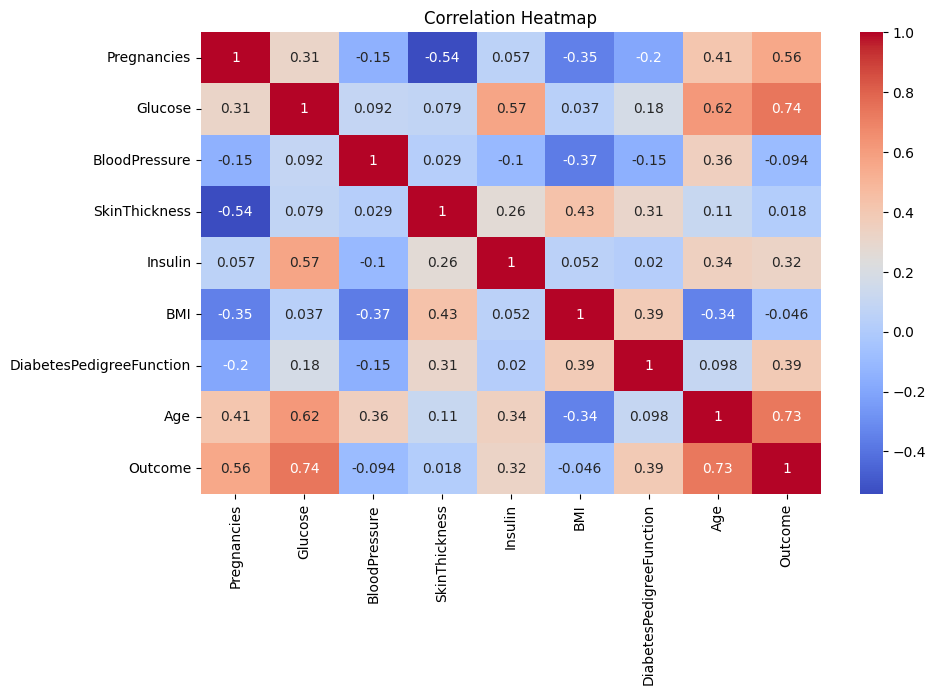

Accuracy: 1.0

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



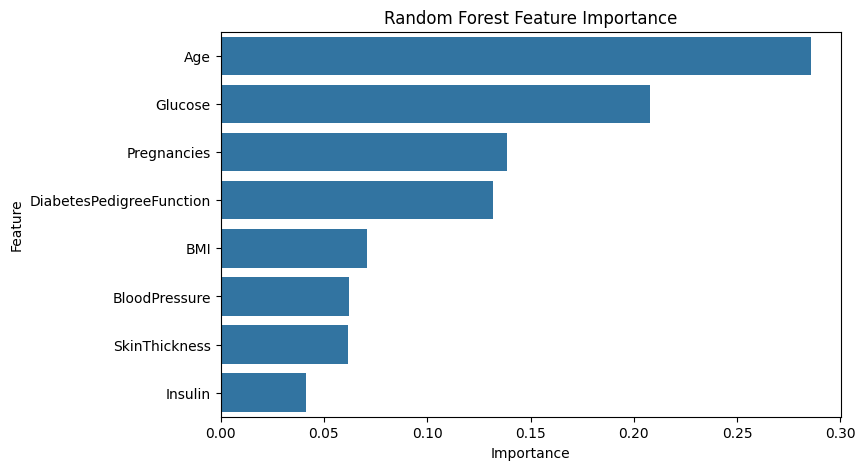

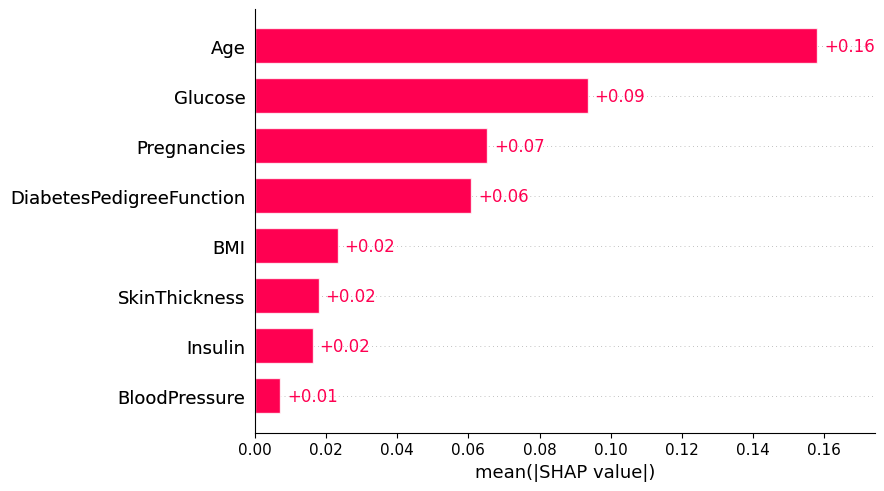

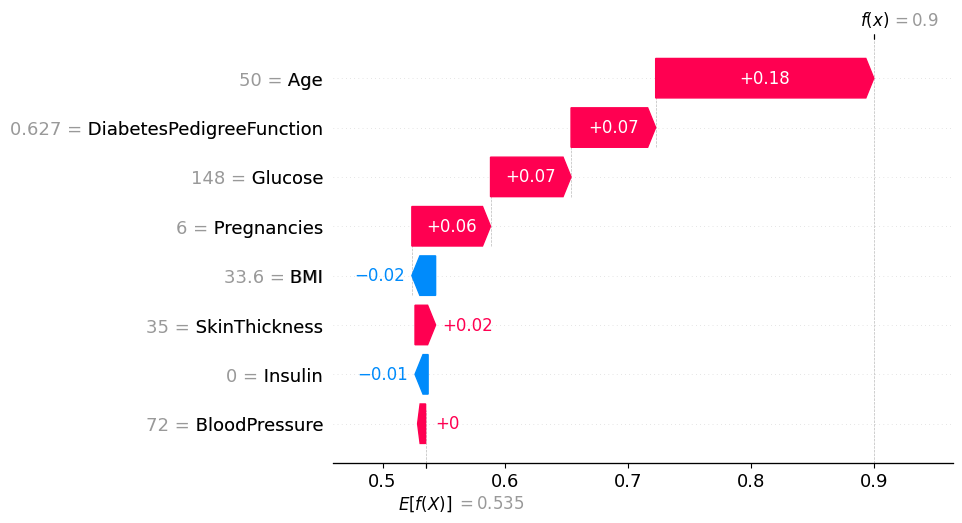


AI Response
{'Risk Level': 'High Risk', 'Risk Probability': np.float64(0.9)}

This AI provides educational risk insights only. It does not diagnose diseases. Always consult a healthcare professional.


In [16]:
# Install libraries
!pip install shap scikit-learn pandas numpy matplotlib seaborn

# -----------------------------
# IMPORTS
# -----------------------------
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# DATASET
# -----------------------------
data = {
    "Pregnancies": [6,1,8,1,0,5,3,10,2,8,4,3,2,7,5,1,0,4,6,3],
    "Glucose": [148,85,183,89,137,116,78,115,197,125,110,168,139,189,166,100,118,140,130,95],
    "BloodPressure": [72,66,64,66,40,74,50,0,70,96,92,74,62,60,72,68,76,78,88,64],
    "SkinThickness": [35,29,0,23,35,0,32,0,45,0,0,38,17,23,19,28,33,0,42,27],
    "Insulin": [0,0,0,94,168,0,88,0,543,0,0,0,0,846,175,0,0,0,0,0],
    "BMI": [33.6,26.6,23.3,28.1,43.1,25.6,31.0,35.3,30.5,0.0,37.6,38.0,33.6,30.1,25.8,30.0,32.5,29.7,36.2,28.4],
    "DiabetesPedigreeFunction": [0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232,0.191,0.537,0.245,0.398,0.587,0.484,0.254,0.452,0.921,0.341],
    "Age": [50,31,32,21,33,30,26,29,53,54,30,34,29,41,51,23,27,39,45,28],
    "Outcome": [1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,0,1,1,0]
}

df = pd.DataFrame(data)

# -----------------------------
# VISUALIZATION 1: CORRELATION
# -----------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# SPLIT
# -----------------------------
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# MODEL
# -----------------------------
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# EVALUATION
# -----------------------------
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report\n")
print(classification_report(y_test, y_pred))

# -----------------------------
# VISUALIZATION 2: FEATURE IMPORTANCE
# -----------------------------
fi = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=fi)
plt.title("Random Forest Feature Importance")
plt.show()

# -----------------------------
# SHAP (CORRECT CLASS HANDLING)
# -----------------------------
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Select positive class (class = 1)
shap_values_class1 = shap_values[..., 1]

# -----------------------------
# VISUALIZATION 3: GLOBAL SHAP BAR
# -----------------------------
shap.plots.bar(shap_values_class1, max_display=10)

# -----------------------------
# VISUALIZATION 4: SINGLE PATIENT
# -----------------------------
shap.plots.waterfall(shap_values_class1[0])

# -----------------------------
# CHATGPT-LIKE RESPONSE
# -----------------------------
def explain_prediction(input_df):
    pred = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0][1]
    return {
        "Risk Level": "High Risk" if pred == 1 else "Low Risk",
        "Risk Probability": round(prob, 2)
    }

print("\nAI Response")
print(explain_prediction(X_test.iloc[[0]]))

# -----------------------------
# SAFETY MESSAGE
# -----------------------------
print(
    "\nThis AI provides educational risk insights only. "
    "It does not diagnose diseases. "
    "Always consult a healthcare professional."
)
